# DSC 540 Term Project
## Milestone 2: Clean/ Format Flat File
Isabella Sturm

2021-04-22

In [23]:
import pandas as pd

# Load flat file data
df_2015 = pd.read_csv('2015.csv')
print('2015 DATA')
print(df_2015.shape)
print(df_2015.columns)
print(df_2015.head(1))

df_2016 = pd.read_csv('2016.csv')
print('\n2016 DATA')
print(df_2016.shape)
print(df_2016.columns)
print(df_2016.head(1))

df_2017 = pd.read_csv('2017.csv')
print('\n2017 DATA')
print(df_2017.shape)
print(df_2017.columns)
print(df_2017.head(1))

df_2018 = pd.read_csv('2018.csv')
print('\n2018 DATA')
print(df_2018.shape)
print(df_2018.columns)
print(df_2018.head(1))

df_2019 = pd.read_csv('2019.csv')
print('\n2019 DATA')
print(df_2019.shape)
print(df_2019.columns)
print(df_2019.head(1))

2015 DATA
(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  

2016 DATA
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trus

In [45]:
# Transform 2: Add Year column for to identify which rows come from each dataset when combined
subset_2015 = subset_2015.assign(Year=2015)
subset_2016 = subset_2016.assign(Year=2016)
subset_2017 = subset_2017.assign(Year=2017)
subset_2018 = subset_2018.assign(Year=2018)
subset_2019 = subset_2019.assign(Year=2019)

In [46]:
# Transform 3
# Rename columns
subset_2015 = subset_2015.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
                   'Trust (Government Corruption)': 'Trust'})
subset_2016 = subset_2016.rename(columns={'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
                   'Trust (Government Corruption)': 'Trust'})
subset_2017 = subset_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                   'Economy..GDP.per.Capita.': 'Economy','Health..Life.Expectancy.': 'Health',
                   'Trust..Government.Corruption.': 'Trust'})
subset_2018 = subset_2018.rename(columns={'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 
                   'Score': 'Happiness Score', 'GDP per capita': 'Economy',
                   'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust'})
subset_2019 = subset_2019.rename(columns={'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 
                   'Score': 'Happiness Score', 'GDP per capita': 'Economy',
                   'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom',
                   'Perceptions of corruption': 'Trust'})


In [47]:
# Transform 4
# Combine data into one dataframe
# Common columns: Country, Happiness Rank, Score, GDP per capita, Life Expectancy, Generosity, 
#                 Trust/Perceptions of Corruptions, Freedom Generosity
# Others: Family, Social Support, Dystopia Residual
dataframes = [subset_2015, subset_2016, subset_2017, subset_2018, subset_2019]
happiness_df = pd.concat(dataframes)
happiness_df.head()

,Country,Happiness Rank,Happiness Score,Economy,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015


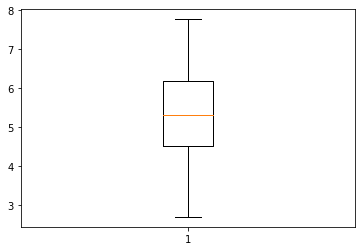

In [50]:
# Transform 5: Identify Outliers
import matplotlib.pyplot as plt

plt.boxplot(x='Happiness Score', data=happiness_df)
plt.show()

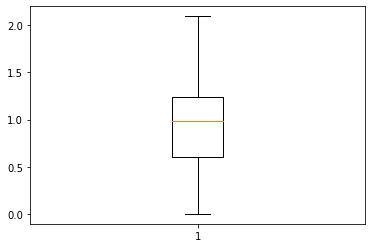

In [51]:
plt.boxplot(x='Economy', data=happiness_df)
plt.show()

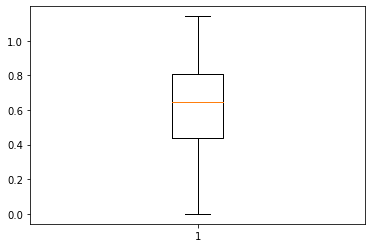

In [52]:
 plt.boxplot(x='Health', data=happiness_df)
plt.show()

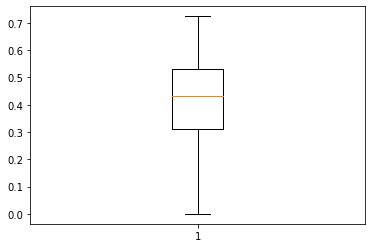

In [53]:
plt.boxplot(x='Freedom', data=happiness_df)
plt.show()

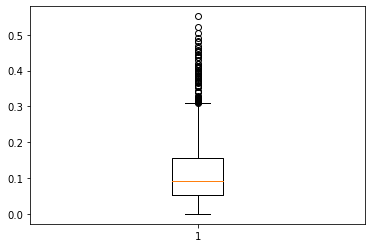

In [58]:
plt.boxplot(x=happiness_df['Trust'].dropna())
plt.show()

In [60]:
happiness_df[happiness_df['Trust'] > 0.3]

,Country,Happiness Rank,Happiness Score,Economy,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,6,7.406,1.29025,0.88911,0.64169,0.41372,0.23351,2015
...,...,...,...,...,...,...,...,...,...
8,Canada,9,7.278,1.36500,1.03900,0.58400,0.30800,0.28500,2019
13,Luxembourg,14,7.090,1.60900,1.01200,0.52600,0.31600,0.19400,2019
15,Ireland,16,7.021,1.49900,0.99900,0.51600,0.31000,0.29800,2019
33,Singapore,34,6.262,1.57200,1.14100,0.55600,0.45300,0.27100,2019


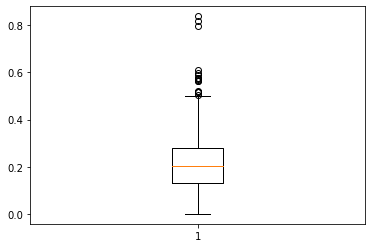

In [61]:
plt.boxplot(x=happiness_df['Generosity'].dropna())
plt.show()

In [62]:
happiness_df[happiness_df['Generosity'] > 0.5]

,Country,Happiness Rank,Happiness Score,Economy,Health,Freedom,Trust,Generosity,Year
20,United Kingdom,21,6.867,1.266370,0.909430,0.596250,0.320670,0.519120,2015
33,Thailand,34,6.455,0.966900,0.738500,0.556640,0.031870,0.576300,2015
36,Malta,37,6.302,1.207400,0.887210,0.603650,0.135860,0.517520,2015
73,Indonesia,74,5.399,0.828270,0.637930,0.466110,0.000000,0.515350,2015
90,Somaliland region,91,5.057,0.188470,0.438730,0.465820,0.399280,0.503180,2015
128,Myanmar,129,4.307,0.271080,0.482460,0.440170,0.190340,0.795880,2015
22,United Kingdom,23,6.725,1.402830,0.809910,0.500360,0.273990,0.501560,2016
29,Malta,30,6.488,1.307820,0.803150,0.549940,0.175540,0.562370,2016
32,Thailand,33,6.474,1.089300,0.649150,0.495530,0.028330,0.586960,2016
78,Indonesia,79,5.314,0.951040,0.493740,0.392370,0.003220,0.565210,2016


In [63]:
# Note: Only columns with outliers are Trust and Generosity

## Milestone 3: Clean/Format Website Data
Isabella Sturm

2021-05-07

In [33]:
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [1]:
# Read in page (https://en.wikipedia.org/wiki/World_Happiness_Report#International_rankings)
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/World_Happiness_Report#International_rankings')
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table')
print("Number of tables: ", len(tables))

Number of tables:  20


In [5]:
whr_tables = soup.find_all('table', {'class': 'wikitable sortable'})
print("Number of World Happiness Report tables: ", len(whr_tables))

Number of World Happiness Report tables:  5


In [18]:
# Get 2019 data
rows_2019 = whr_tables[0].find_all('tr')
data_2019 = rows_2019[1:]
headers_2019 = rows_2019[0]
df_2019_headers = [th.getText().replace("\n","") for th in headers_2019.find_all('th')]
df_2019_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2019]
df_2019_web = pd.DataFrame(df_2019_data, columns=df_2019_headers)
print(df_2019_web.head(),"\n-----------------------------------------")

# Get 2018 data
rows_2018 = whr_tables[0].find_all('tr')
data_2018 = rows_2018[1:]
headers_2018 = rows_2018[0]
df_2018_headers = [th.getText().replace("\n","") for th in headers_2018.find_all('th')]
df_2018_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2018]
df_2018_web = pd.DataFrame(df_2018_data, columns=df_2018_headers)
print(df_2018_web.head(),"\n-----------------------------------------")

# Get 2017 data
rows_2017 = whr_tables[0].find_all('tr')
data_2017 = rows_2017[1:]
headers_2017 = rows_2017[0]
df_2017_headers = [th.getText().replace("\n","") for th in headers_2017.find_all('th')]
df_2017_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2017]
df_2017_web = pd.DataFrame(df_2017_data, columns=df_2017_headers)
print(df_2017_web.head(),"\n-----------------------------------------")

# Get 2016 data
rows_2016 = whr_tables[0].find_all('tr')
data_2016 = rows_2016[1:]
headers_2016 = rows_2016[0]
df_2016_headers = [th.getText().replace("\n","") for th in headers_2016.find_all('th')]
df_2016_data = [[td.getText() for td in tr.find_all('td')] for tr in data_2016]
df_2016_web = pd.DataFrame(df_2016_data, columns=df_2016_headers)
print(df_2016_web.head(),"\n-----------------------------------------")

  Overall rank Country or region  Score GDP per capita Social support  \
0            1           Finland  7.809          1.285          1.500   
1            2           Denmark  7.646          1.327          1.503   
2            3       Switzerland  7.560          1.391          1.472   
3            4           Iceland  7.504          1.327          1.548   
4            5            Norway  7.488          1.424          1.495   

  Healthy life expectancy Freedom to make life choices Generosity  \
0                   0.961                        0.662      0.160   
1                   0.979                        0.665      0.243   
2                   1.041                        0.629      0.269   
3                   1.001                        0.662      0.362   
4                   1.008                        0.670      0.288   

  Perceptions of corruption  
0                   0.478\n  
1                   0.495\n  
2                   0.408\n  
3                   0.145\

In [14]:
print(df_2019_web.columns)
print(df_2018_web.columns)
print(df_2017_web.columns)
print(df_2016_web.columns)

Index(['Overall rank\n', 'Country or region\n', 'Score\n', 'GDP per capita\n',
       'Social support\n', 'Healthy life expectancy\n',
       'Freedom to make life choices\n', 'Generosity\n',
       'Perceptions of corruption\n'],
      dtype='object')
Index(['Overall rank\n', 'Country or region\n', 'Score\n', 'GDP per capita\n',
       'Social support\n', 'Healthy life expectancy\n',
       'Freedom to make life choices\n', 'Generosity\n',
       'Perceptions of corruption\n'],
      dtype='object')
Index(['Overall rank\n', 'Country or region\n', 'Score\n', 'GDP per capita\n',
       'Social support\n', 'Healthy life expectancy\n',
       'Freedom to make life choices\n', 'Generosity\n',
       'Perceptions of corruption\n'],
      dtype='object')
Index(['Overall rank\n', 'Country or region\n', 'Score\n', 'GDP per capita\n',
       'Social support\n', 'Healthy life expectancy\n',
       'Freedom to make life choices\n', 'Generosity\n',
       'Perceptions of corruption\n'],
      dtyp

In [30]:
# Transform 1: Add new column for year
df_2019_web = df_2019_web.assign(Year=2019)
df_2018_web = df_2018_web.assign(Year=2018)
df_2017_web = df_2017_web.assign(Year=2017)
df_2016_web = df_2016_web.assign(Year=2016)


In [31]:
# Transform 2: Combine datasets
dataframes = [df_2019_web, df_2018_web, df_2017_web, df_2016_web]
df_web = pd.concat(dataframes)
df_web.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478\n,2019
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495\n,2019
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408\n,2019
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145\n,2019
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434\n,2019


In [43]:
# Transform 3: Remove new line (\n) at the end of values in dataframe
for col in df_web.columns:
    df_web[col] = df_web[col].apply(lambda x: str(x).replace("\n", ""))
    
    # Set numeric columns back to int/float from string
    if col in ["Overall Rank", "Year"]:
        df_web[col] = df_web[col].apply(lambda x: int(x))
    elif col in ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
                    "Freedom to make life choices", "Generosity", "Perceptions of corruption"]:
        df_web[col] = df_web[col].apply(lambda x: float(x))

df_web.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,2019
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,2019
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,2019
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,2019
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,2019


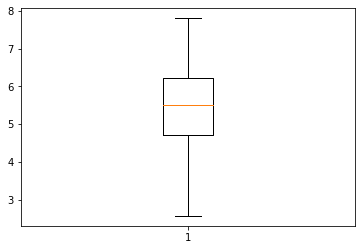

In [37]:
# Transform 4: Check for outliers
plt.boxplot(x=df_web['Score'])
plt.show()

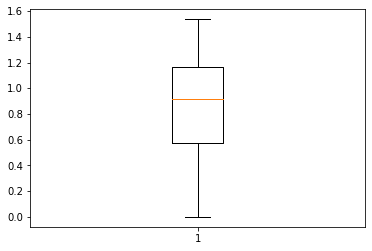

In [39]:
plt.boxplot(x=df_web['GDP per capita'])
plt.show()

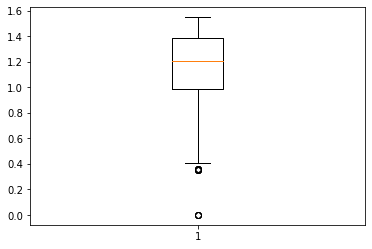

In [40]:
plt.boxplot(x=df_web['Social support'])
plt.show()

In [41]:
print("Outliers: ", df_web[df_web['Social support'] < 0.4])

Outliers:      Overall rank          Country or region  Score  GDP per capita  \
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   
85            86                      Benin  5.216           0.366   
148          149   Central African Republic  3.476           0.041   
152          153                Afghanistan  2.567           0.301   

     Social support Healthy life expectancy  Freedom to make life choices  \
8

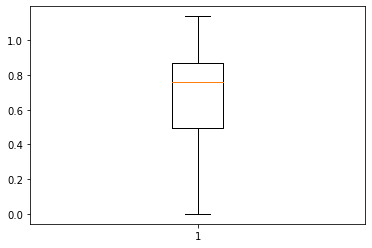

In [44]:
plt.boxplot(x=df_web['Healthy life expectancy'])
plt.show()

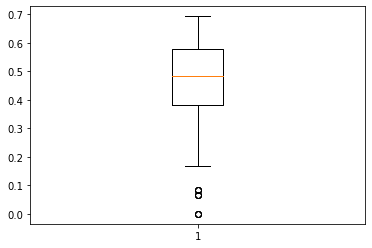

In [45]:
plt.boxplot(x=df_web['Freedom to make life choices'])
plt.show()

In [46]:
print("Outliers: ", df_web[df_web['Freedom to make life choices'] < 0.15])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301           0.356   
99           100           Algeria  5.005           0.944           1.143   
151          152       South Sudan  2.817           0.289           0.553   
152          153       Afghanistan  2.567           0.301        

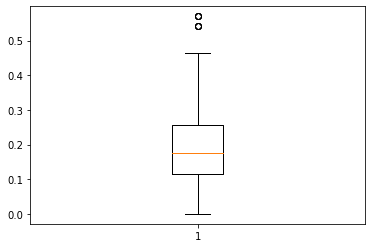

In [47]:
plt.boxplot(x=df_web['Generosity'])
plt.show()

In [49]:
print("Outliers: ", df_web[df_web['Generosity'] > 0.5])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   
83            84         Indonesia  5.286           0.892           1.155   
132          133           Myanmar  4.308           0.678           1.098   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
83                     0.610                         0.568       0.543   
132                    0.495                         0.597       0.570   
83                     0.610                         0.568       0.543   

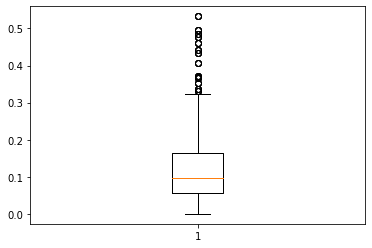

In [50]:
plt.boxplot(x=df_web['Perceptions of corruption'])
plt.show()

In [52]:
print("Outliers: ", df_web[df_web['Perceptions of corruption'] > 0.32])

Outliers:      Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.809           1.285           1.500   
1              2           Denmark  7.646           1.327           1.503   
2              3       Switzerland  7.560           1.391           1.472   
4              5            Norway  7.488           1.424           1.495   
5              6       Netherlands  7.449           1.339           1.464   
6              7            Sweden  7.353           1.322           1.433   
7              8       New Zealand  7.300           1.242           1.487   
9             10        Luxembourg  7.238           1.537           1.388   
10            11            Canada  7.232           1.302           1.435   
11            12         Australia  7.223           1.310           1.477   
12            13    United Kingdom  7.165           1.273           1.458   
15            16           Ireland  7.094           1.447        